### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], axis=1)

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

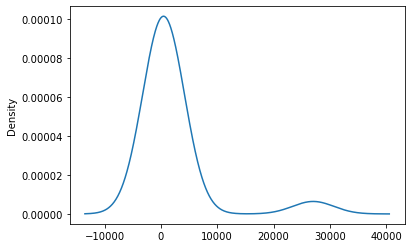

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = application_counts[application_counts < 500].index.tolist()

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts.head(50)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C4100        6
C1720        6
C1600        5
C1257        5
C2710        3
C1260        3
C0           3
C3200        2
C1267        2
C1246        2
C1234        2
C1256        2
C2380        1
C1236        1
C4120        1
C1248        1
C1245        1
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

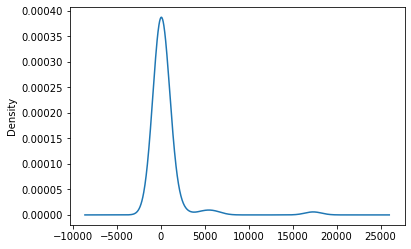

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = classification_counts[classification_counts < 800].index.tolist()

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, 1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop(columns=["IS_SUCCESSFUL"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features = len(X_train_scaled[0])
hidden_nodes1 = 30
hidden_nodes2 = 25

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim=num_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                1320      
_________________________________________________________________
dense_1 (Dense)              (None, 25)                775       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 2,121
Trainable params: 2,121
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and file names
os.makedirs("checkpoints_optimizer1/", exist_ok=True)
checkpoint_path = "checkpoints_optimizer1/weights.{epoch:02d}.hdf5"

In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_weights_only=True, save_freq=5)

In [19]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=50, callbacks=[cp_callback])

Epoch 1/50
  1/804 [..............................] - ETA: 4:27 - loss: 606005.7500 - accuracy: 0.3750
Epoch 00001: saving model to checkpoints_optimizer1/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer1/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer1/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer1/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer1/weights.01.hdf5
 27/804 [>.............................] - ETA: 1s - loss: 25816.0996 - accuracy: 0.4954   
Epoch 00001: saving model to checkpoints_optimizer1/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer1/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer1/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer1/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer1/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer1/weights.01.hdf5
 56/804 [=>............................] - ETA: 


Epoch 00001: saving model to checkpoints_optimizer1/weights.01.hdf5
491/804 [=================>............] - ETA: 0s - loss: 4725.2466 - accuracy: 0.4966
Epoch 00001: saving model to checkpoints_optimizer1/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer1/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer1/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer1/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer1/weights.01.hdf5
517/804 [==================>...........] - ETA: 0s - loss: 4515.4419 - accuracy: 0.4944
Epoch 00001: saving model to checkpoints_optimizer1/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer1/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer1/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer1/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer1/weights.01.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 4301.790


Epoch 00002: saving model to checkpoints_optimizer1/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1/weights.02.hdf5
178/804 [=====>........................] - ETA: 1s - loss: 20722.5977 - accuracy: 0.4781
Epoch 00002: saving model to checkpoints_optimizer1/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1/weights.02.hdf5
207/804 [======>.......................] - ETA: 1s - loss: 19731.8613 - accuracy: 0.4789
Epoch 00002: saving model to checkpoints_optimizer1/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1/weights.02.h

657/804 [=======================>......] - ETA: 0s - loss: 35345.0938 - accuracy: 0.4994
Epoch 00002: saving model to checkpoints_optimizer1/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1/weights.02.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 36787.8359 - accuracy: 0.5010
Epoch 00002: saving model to checkpoints_optimizer1/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1/weights.02.h


Epoch 00003: saving model to checkpoints_optimizer1/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer1/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer1/weights.03.hdf5
358/804 [============>.................] - ETA: 0s - loss: 3108.4990 - accuracy: 0.5119
Epoch 00003: saving model to checkpoints_optimizer1/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer1/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer1/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer1/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer1/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer1/weights.03.hdf5
388/804 [=============>................] - ETA: 0s - loss: 3432.7080 - accuracy: 0.5112
Epoch 00003: saving model to checkpoints_optimizer1/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer1/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer1/weights.03.hdf

 30/804 [>.............................] - ETA: 1s - loss: 8325.9551 - accuracy: 0.5042
Epoch 00004: saving model to checkpoints_optimizer1/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1/weights.04.hdf5
 59/804 [=>............................] - ETA: 1s - loss: 5077.5957 - accuracy: 0.5122
Epoch 00004: saving model to checkpoints_optimizer1/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1/weights.04.hdf


Epoch 00004: saving model to checkpoints_optimizer1/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1/weights.04.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 73953.7969 - accuracy: 0.4919
Epoch 00004: saving model to checkpoints_optimizer1/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1/weights.04.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 70056.7578 - accuracy: 0.4947
Epoch 00004: saving model to checkpoints_optimizer1/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1/weights.04.h

210/804 [======>.......................] - ETA: 1s - loss: 13742.7295 - accuracy: 0.5103
Epoch 00005: saving model to checkpoints_optimizer1/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1/weights.05.hdf5
238/804 [=======>......................] - ETA: 0s - loss: 12149.9883 - accuracy: 0.5168
Epoch 00005: saving model to checkpoints_optimizer1/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1/weights.05.hdf5
267/804 [========>.....................] - ETA: 0s - loss: 10895.


Epoch 00005: saving model to checkpoints_optimizer1/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1/weights.05.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 9214.8008 - accuracy: 0.5272
Epoch 00005: saving model to checkpoints_optimizer1/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1/weights.05.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 8909.4521 - accuracy: 0.5252
Epoch 00005: saving model to checkpoints_optimizer1/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1/weights.05.hdf


Epoch 00006: saving model to checkpoints_optimizer1/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer1/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer1/weights.06.hdf5
391/804 [=============>................] - ETA: 0s - loss: 5568.5449 - accuracy: 0.5241
Epoch 00006: saving model to checkpoints_optimizer1/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer1/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer1/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer1/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer1/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer1/weights.06.hdf5
421/804 [==============>...............] - ETA: 0s - loss: 6662.4341 - accuracy: 0.5231
Epoch 00006: saving model to checkpoints_optimizer1/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer1/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer1/weights.06.hdf

 54/804 [=>............................] - ETA: 1s - loss: 11065.6201 - accuracy: 0.4740
Epoch 00007: saving model to checkpoints_optimizer1/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1/weights.07.hdf5
 78/804 [=>............................] - ETA: 1s - loss: 8600.2568 - accuracy: 0.4688 
Epoch 00007: saving model to checkpoints_optimizer1/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1/weights.07.hdf5
107/804 [==>...........................] - ETA: 1s - loss: 7035.2


Epoch 00007: saving model to checkpoints_optimizer1/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1/weights.07.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 3896.1836 - accuracy: 0.4867
Epoch 00007: saving model to checkpoints_optimizer1/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1/weights.07.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 3941.9353 - accuracy: 0.4874
Epoch 00007: saving model to checkpoints_optimizer1/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1/weights.07.hdf


Epoch 00008: saving model to checkpoints_optimizer1/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1/weights.08.hdf5
238/804 [=======>......................] - ETA: 0s - loss: 12903.7549 - accuracy: 0.4643
Epoch 00008: saving model to checkpoints_optimizer1/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1/weights.08.hdf5
268/804 [=========>....................] - ETA: 0s - loss: 11618.6973 - accuracy: 0.4717
Epoch 00008: saving model to checkpoints_optimizer1/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1/weights.08.h


Epoch 00008: saving model to checkpoints_optimizer1/weights.08.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 31579.4844 - accuracy: 0.5024
Epoch 00008: saving model to checkpoints_optimizer1/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1/weights.08.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 30323.4785 - accuracy: 0.5043
Epoch 00008: saving model to checkpoints_optimizer1/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1/weights.08.h

389/804 [=============>................] - ETA: 0s - loss: 3824.4617 - accuracy: 0.4846
Epoch 00009: saving model to checkpoints_optimizer1/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer1/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer1/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer1/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer1/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer1/weights.09.hdf5
419/804 [==============>...............] - ETA: 0s - loss: 3611.3184 - accuracy: 0.4839
Epoch 00009: saving model to checkpoints_optimizer1/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer1/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer1/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer1/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer1/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer1/weights.09.hdf


Epoch 00010: saving model to checkpoints_optimizer1/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1/weights.10.hdf5
 90/804 [==>...........................] - ETA: 1s - loss: 4506.9717 - accuracy: 0.4872
Epoch 00010: saving model to checkpoints_optimizer1/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1/weights.10.hdf5
120/804 [===>..........................] - ETA: 1s - loss: 7058.6943 - accuracy: 0.4880
Epoch 00010: saving model to checkpoints_optimizer1/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1/weights.10.hdf

570/804 [====================>.........] - ETA: 0s - loss: 3312.6514 - accuracy: 0.4825
Epoch 00010: saving model to checkpoints_optimizer1/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1/weights.10.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 3349.1165 - accuracy: 0.4810
Epoch 00010: saving model to checkpoints_optimizer1/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1/weights.10.hdf


Epoch 00011: saving model to checkpoints_optimizer1/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1/weights.11.hdf5
271/804 [=========>....................] - ETA: 0s - loss: 17442.7012 - accuracy: 0.4946
Epoch 00011: saving model to checkpoints_optimizer1/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1/weights.11.hdf5
301/804 [==========>...................] - ETA: 0s - loss: 16698.1953 - accuracy: 0.4956
Epoch 00011: saving model to checkpoints_optimizer1/weights.11.h


Epoch 00011: saving model to checkpoints_optimizer1/weights.11.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 9387.0117 - accuracy: 0.4870
Epoch 00011: saving model to checkpoints_optimizer1/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1/weights.11.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 9294.1484 - accuracy: 0.4891
Epoch 00011: saving model to checkpoints_optimizer1/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1/weights.11.hdf

417/804 [==============>...............] - ETA: 0s - loss: 10387.8994 - accuracy: 0.4921
Epoch 00012: saving model to checkpoints_optimizer1/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer1/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer1/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer1/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer1/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer1/weights.12.hdf5
447/804 [===============>..............] - ETA: 0s - loss: 9704.0596 - accuracy: 0.4951 
Epoch 00012: saving model to checkpoints_optimizer1/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer1/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer1/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer1/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer1/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer1/weights.12.h


Epoch 00013: saving model to checkpoints_optimizer1/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1/weights.13.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 421.7726 - accuracy: 0.5138
Epoch 00013: saving model to checkpoints_optimizer1/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1/weights.13.hdf5
148/804 [====>.........................] - ETA: 1s - loss: 776.2000 - accuracy: 0.5030
Epoch 00013: saving model to checkpoints_optimizer1/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1/weights.13.hdf5



Epoch 00013: saving model to checkpoints_optimizer1/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1/weights.13.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 5886.3120 - accuracy: 0.4965
Epoch 00013: saving model to checkpoints_optimizer1/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1/weights.13.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 5697.9951 - accuracy: 0.4986
Epoch 00013: saving model to checkpoints_optimizer1/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1/weights.13.hdf

269/804 [=========>....................] - ETA: 0s - loss: 1829.2416 - accuracy: 0.5264
Epoch 00014: saving model to checkpoints_optimizer1/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1/weights.14.hdf5
299/804 [==========>...................] - ETA: 0s - loss: 2254.3396 - accuracy: 0.5284
Epoch 00014: saving model to checkpoints_optimizer1/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1/weights.14.hdf


Epoch 00014: saving model to checkpoints_optimizer1/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1/weights.14.hdf5
779/804 [============================>.] - ETA: 0s - loss: 3861.3926 - accuracy: 0.5209
Epoch 00014: saving model to checkpoints_optimizer1/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1/weights.14.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 5264.5596 - accuracy: 0.5202
Epoch 15/50
  1/804 [..............................] - ETA: 0s - loss: 7.3084 - accuracy: 0.5000
Epoch 00015: saving model to checkpoints_optimizer1/weights.15.hdf5

Epoch 00015: saving model to check


Epoch 00015: saving model to checkpoints_optimizer1/weights.15.hdf5
450/804 [===============>..............] - ETA: 0s - loss: 7952.6968 - accuracy: 0.5067
Epoch 00015: saving model to checkpoints_optimizer1/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer1/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer1/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer1/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer1/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer1/weights.15.hdf5
480/804 [================>.............] - ETA: 0s - loss: 7466.4619 - accuracy: 0.5055
Epoch 00015: saving model to checkpoints_optimizer1/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer1/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer1/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer1/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer1/weights.15.hdf

121/804 [===>..........................] - ETA: 1s - loss: 13413.5039 - accuracy: 0.4858
Epoch 00016: saving model to checkpoints_optimizer1/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1/weights.16.hdf5
151/804 [====>.........................] - ETA: 1s - loss: 10813.2471 - accuracy: 0.4894
Epoch 00016: saving model to checkpoints_optimizer1/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1/weights.16.h


Epoch 00016: saving model to checkpoints_optimizer1/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1/weights.16.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 2942.1160 - accuracy: 0.5182
Epoch 00016: saving model to checkpoints_optimizer1/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1/weights.16.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 8137.6650 - accuracy: 0.5197
Epoch 00016: saving model to checkpoints_optimizer1/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1/weights.16.hdf

297/804 [==========>...................] - ETA: 0s - loss: 5304.8784 - accuracy: 0.4604
Epoch 00017: saving model to checkpoints_optimizer1/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer1/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer1/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer1/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer1/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer1/weights.17.hdf5
327/804 [===========>..................] - ETA: 0s - loss: 4837.7769 - accuracy: 0.4686
Epoch 00017: saving model to checkpoints_optimizer1/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer1/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer1/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer1/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer1/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer1/weights.17.hdf


Epoch 00017: saving model to checkpoints_optimizer1/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer1/weights.17.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 4037.9417 - accuracy: 0.4833
Epoch 18/50
  1/804 [..............................] - ETA: 0s - loss: 5.4663 - accuracy: 0.4688
Epoch 00018: saving model to checkpoints_optimizer1/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer1/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer1/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer1/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer1/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer1/weights.18.hdf5
 28/804 [>.............................] - ETA: 1s - loss: 8.5448 - accuracy: 0.5257
Epoch 00018: saving model to checkpoints_optimizer1/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer1/weights.18.hdf5

Epoch 00018: saving model to checkpoi

478/804 [================>.............] - ETA: 0s - loss: 2910.3604 - accuracy: 0.5152
Epoch 00018: saving model to checkpoints_optimizer1/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer1/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer1/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer1/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer1/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer1/weights.18.hdf5
508/804 [=================>............] - ETA: 0s - loss: 2792.2437 - accuracy: 0.5128
Epoch 00018: saving model to checkpoints_optimizer1/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer1/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer1/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer1/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer1/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer1/weights.18.hdf


Epoch 00019: saving model to checkpoints_optimizer1/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1/weights.19.hdf5
179/804 [=====>........................] - ETA: 1s - loss: 364.8958 - accuracy: 0.4942
Epoch 00019: saving model to checkpoints_optimizer1/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1/weights.19.hdf5
209/804 [======>.......................] - ETA: 1s - loss: 319.7072 - accuracy: 0.4975
Epoch 00019: saving model to checkpoints_optimizer1/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1/weights.19.hdf5


659/804 [=======================>......] - ETA: 0s - loss: 3057.8125 - accuracy: 0.4956
Epoch 00019: saving model to checkpoints_optimizer1/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1/weights.19.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 2956.2708 - accuracy: 0.4968
Epoch 00019: saving model to checkpoints_optimizer1/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1/weights.19.hdf


Epoch 00020: saving model to checkpoints_optimizer1/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer1/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer1/weights.20.hdf5
360/804 [============>.................] - ETA: 0s - loss: 2101.4385 - accuracy: 0.5159
Epoch 00020: saving model to checkpoints_optimizer1/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer1/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer1/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer1/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer1/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer1/weights.20.hdf5
390/804 [=============>................] - ETA: 0s - loss: 1974.8596 - accuracy: 0.5178
Epoch 00020: saving model to checkpoints_optimizer1/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer1/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer1/weights.20.hdf

 31/804 [>.............................] - ETA: 1s - loss: 274.0622 - accuracy: 0.5403
Epoch 00021: saving model to checkpoints_optimizer1/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1/weights.21.hdf5
 61/804 [=>............................] - ETA: 1s - loss: 282.0790 - accuracy: 0.5323
Epoch 00021: saving model to checkpoints_optimizer1/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1/weights.21.hdf5



Epoch 00021: saving model to checkpoints_optimizer1/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1/weights.21.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 739.2858 - accuracy: 0.5033
Epoch 00021: saving model to checkpoints_optimizer1/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1/weights.21.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 729.9655 - accuracy: 0.5046
Epoch 00021: saving model to checkpoints_optimizer1/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1/weights.21.hdf5


207/804 [======>.......................] - ETA: 1s - loss: 438.6767 - accuracy: 0.4970
Epoch 00022: saving model to checkpoints_optimizer1/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1/weights.22.hdf5
237/804 [=======>......................] - ETA: 0s - loss: 427.6064 - accuracy: 0.4935
Epoch 00022: saving model to checkpoints_optimizer1/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1/weights.22.hdf5



Epoch 00022: saving model to checkpoints_optimizer1/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1/weights.22.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 1895.5115 - accuracy: 0.4921
Epoch 00022: saving model to checkpoints_optimizer1/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1/weights.22.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 1819.7129 - accuracy: 0.4932
Epoch 00022: saving model to checkpoints_optimizer1/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1/weights.22.hdf

383/804 [=============>................] - ETA: 0s - loss: 359.7024 - accuracy: 0.5027
Epoch 00023: saving model to checkpoints_optimizer1/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer1/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer1/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer1/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer1/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer1/weights.23.hdf5
413/804 [==============>...............] - ETA: 0s - loss: 954.8857 - accuracy: 0.5038
Epoch 00023: saving model to checkpoints_optimizer1/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer1/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer1/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer1/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer1/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer1/weights.23.hdf5



Epoch 00024: saving model to checkpoints_optimizer1/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1/weights.24.hdf5
 89/804 [==>...........................] - ETA: 1s - loss: 12.1883 - accuracy: 0.5263
Epoch 00024: saving model to checkpoints_optimizer1/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1/weights.24.hdf5
119/804 [===>..........................] - ETA: 1s - loss: 14.4196 - accuracy: 0.5305
Epoch 00024: saving model to checkpoints_optimizer1/weights.24.hdf5

E


Epoch 00024: saving model to checkpoints_optimizer1/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1/weights.24.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 663.8729 - accuracy: 0.5187
Epoch 00024: saving model to checkpoints_optimizer1/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1/weights.24.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 631.9207 - accuracy: 0.5172
Epoch 00024: saving model to checkpoints_optimizer1/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1/weights.24.hdf5


240/804 [=======>......................] - ETA: 0s - loss: 276.6827 - accuracy: 0.4681
Epoch 00025: saving model to checkpoints_optimizer1/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1/weights.25.hdf5
270/804 [=========>....................] - ETA: 0s - loss: 271.5213 - accuracy: 0.4713
Epoch 00025: saving model to checkpoints_optimizer1/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1/weights.25.hdf5



Epoch 00025: saving model to checkpoints_optimizer1/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1/weights.25.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 153.0192 - accuracy: 0.5010
Epoch 00025: saving model to checkpoints_optimizer1/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1/weights.25.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 152.5598 - accuracy: 0.5022
Epoch 00025: saving model to checkpoints_optimizer1/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1/weights.25.hdf5


421/804 [==============>...............] - ETA: 0s - loss: 225.9452 - accuracy: 0.5252
Epoch 00026: saving model to checkpoints_optimizer1/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer1/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer1/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer1/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer1/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer1/weights.26.hdf5
451/804 [===============>..............] - ETA: 0s - loss: 239.2596 - accuracy: 0.5256
Epoch 00026: saving model to checkpoints_optimizer1/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer1/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer1/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer1/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer1/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer1/weights.26.hdf5



Epoch 00027: saving model to checkpoints_optimizer1/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1/weights.27.hdf5
117/804 [===>..........................] - ETA: 1s - loss: 71.9061 - accuracy: 0.5379
Epoch 00027: saving model to checkpoints_optimizer1/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1/weights.27.hdf5
147/804 [====>.........................] - ETA: 1s - loss: 57.5286 - accuracy: 0.5393
Epoch 00027: saving model to checkpoints_optimizer1/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1/weights.27.hdf5

E


Epoch 00027: saving model to checkpoints_optimizer1/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1/weights.27.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 2794.2615 - accuracy: 0.5081
Epoch 00027: saving model to checkpoints_optimizer1/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1/weights.27.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 2665.9070 - accuracy: 0.5086
Epoch 00027: saving model to checkpoints_optimizer1/weights.27.hdf


Epoch 00028: saving model to checkpoints_optimizer1/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimizer1/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimizer1/weights.28.hdf5
298/804 [==========>...................] - ETA: 0s - loss: 287.2133 - accuracy: 0.5077
Epoch 00028: saving model to checkpoints_optimizer1/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimizer1/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimizer1/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimizer1/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimizer1/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimizer1/weights.28.hdf5
328/804 [===========>..................] - ETA: 0s - loss: 535.5980 - accuracy: 0.5030
Epoch 00028: saving model to checkpoints_optimizer1/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimizer1/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimizer1/weights.28.hdf5



Epoch 00028: saving model to checkpoints_optimizer1/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimizer1/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimizer1/weights.28.hdf5
798/804 [============================>.] - ETA: 0s - loss: 507.1178 - accuracy: 0.4961
Epoch 00028: saving model to checkpoints_optimizer1/weights.28.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 503.7897 - accuracy: 0.4963
Epoch 29/50
  1/804 [..............................] - ETA: 0s - loss: 190.9675 - accuracy: 0.5938
Epoch 00029: saving model to checkpoints_optimizer1/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer1/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer1/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer1/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer1/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer1/weights.29.hdf5
 29/804 [>.........................


Epoch 00029: saving model to checkpoints_optimizer1/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer1/weights.29.hdf5
479/804 [================>.............] - ETA: 0s - loss: 542.8807 - accuracy: 0.5174
Epoch 00029: saving model to checkpoints_optimizer1/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer1/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer1/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer1/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer1/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer1/weights.29.hdf5
509/804 [=================>............] - ETA: 0s - loss: 511.9581 - accuracy: 0.5148
Epoch 00029: saving model to checkpoints_optimizer1/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer1/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer1/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer1/weights.29.hdf5


150/804 [====>.........................] - ETA: 1s - loss: 19.1125 - accuracy: 0.5377
Epoch 00030: saving model to checkpoints_optimizer1/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimizer1/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimizer1/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimizer1/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimizer1/weights.30.hdf5
178/804 [=====>........................] - ETA: 1s - loss: 16.5064 - accuracy: 0.5397
Epoch 00030: saving model to checkpoints_optimizer1/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimizer1/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimizer1/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimizer1/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimizer1/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimizer1/weights.30.hdf5
205/804 [======>.......................] - ETA: 1s - loss: 14.4918 - ac


Epoch 00030: saving model to checkpoints_optimizer1/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimizer1/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimizer1/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimizer1/weights.30.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 67.2801 - accuracy: 0.5242
Epoch 00030: saving model to checkpoints_optimizer1/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimizer1/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimizer1/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimizer1/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimizer1/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimizer1/weights.30.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 65.4753 - accuracy: 0.5244
Epoch 00030: saving model to checkpoints_optimizer1/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimizer1/weights.30.hdf5

E


Epoch 00031: saving model to checkpoints_optimizer1/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimizer1/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimizer1/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimizer1/weights.31.hdf5
341/804 [===========>..................] - ETA: 0s - loss: 0.7049 - accuracy: 0.5272
Epoch 00031: saving model to checkpoints_optimizer1/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimizer1/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimizer1/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimizer1/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimizer1/weights.31.hdf5
366/804 [============>.................] - ETA: 0s - loss: 0.7044 - accuracy: 0.5278
Epoch 00031: saving model to checkpoints_optimizer1/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimizer1/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimizer1/weights.31.hdf5

Epo


Epoch 00032: saving model to checkpoints_optimizer1/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer1/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer1/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer1/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer1/weights.32.hdf5
 28/804 [>.............................] - ETA: 1s - loss: 0.6941 - accuracy: 0.5379
Epoch 00032: saving model to checkpoints_optimizer1/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer1/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer1/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer1/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer1/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer1/weights.32.hdf5
 57/804 [=>............................] - ETA: 1s - loss: 0.6933 - accuracy: 0.5395
Epoch 00032: saving model to checkpoints_optimizer1/weights.32.hdf5

Epo


Epoch 00032: saving model to checkpoints_optimizer1/weights.32.hdf5
507/804 [=================>............] - ETA: 0s - loss: 0.6942 - accuracy: 0.5277
Epoch 00032: saving model to checkpoints_optimizer1/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer1/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer1/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer1/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer1/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer1/weights.32.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 0.6941 - accuracy: 0.5280
Epoch 00032: saving model to checkpoints_optimizer1/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer1/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer1/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer1/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer1/weights.32.hdf5

Epo


Epoch 00033: saving model to checkpoints_optimizer1/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimizer1/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimizer1/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimizer1/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimizer1/weights.33.hdf5
208/804 [======>.......................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5275
Epoch 00033: saving model to checkpoints_optimizer1/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimizer1/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimizer1/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimizer1/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimizer1/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimizer1/weights.33.hdf5
238/804 [=======>......................] - ETA: 0s - loss: 0.6913 - accuracy: 0.5327
Epoch 00033: saving model to checkpoints_optimizer1/weights.33.hdf5

Epo


Epoch 00033: saving model to checkpoints_optimizer1/weights.33.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5316
Epoch 00033: saving model to checkpoints_optimizer1/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimizer1/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimizer1/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimizer1/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimizer1/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimizer1/weights.33.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5315
Epoch 00033: saving model to checkpoints_optimizer1/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimizer1/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimizer1/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimizer1/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimizer1/weights.33.hdf5

Epo


Epoch 00034: saving model to checkpoints_optimizer1/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimizer1/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimizer1/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimizer1/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimizer1/weights.34.hdf5
389/804 [=============>................] - ETA: 0s - loss: 0.6897 - accuracy: 0.5287
Epoch 00034: saving model to checkpoints_optimizer1/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimizer1/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimizer1/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimizer1/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimizer1/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimizer1/weights.34.hdf5
419/804 [==============>...............] - ETA: 0s - loss: 0.6895 - accuracy: 0.5299
Epoch 00034: saving model to checkpoints_optimizer1/weights.34.hdf5

Epo


Epoch 00035: saving model to checkpoints_optimizer1/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer1/weights.35.hdf5
 60/804 [=>............................] - ETA: 1s - loss: 0.6864 - accuracy: 0.5411
Epoch 00035: saving model to checkpoints_optimizer1/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer1/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer1/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer1/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer1/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer1/weights.35.hdf5
 90/804 [==>...........................] - ETA: 1s - loss: 0.6867 - accuracy: 0.5389
Epoch 00035: saving model to checkpoints_optimizer1/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer1/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer1/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer1/weights.35.hdf5

Epo


Epoch 00035: saving model to checkpoints_optimizer1/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer1/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer1/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer1/weights.35.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.6865 - accuracy: 0.5338
Epoch 00035: saving model to checkpoints_optimizer1/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer1/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer1/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer1/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer1/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer1/weights.35.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.6866 - accuracy: 0.5323
Epoch 00035: saving model to checkpoints_optimizer1/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer1/weights.35.hdf5

Epo


Epoch 00036: saving model to checkpoints_optimizer1/weights.36.hdf5
241/804 [=======>......................] - ETA: 0s - loss: 0.6846 - accuracy: 0.5318
Epoch 00036: saving model to checkpoints_optimizer1/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer1/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer1/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer1/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer1/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer1/weights.36.hdf5
271/804 [=========>....................] - ETA: 0s - loss: 0.6845 - accuracy: 0.5317
Epoch 00036: saving model to checkpoints_optimizer1/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer1/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer1/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer1/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer1/weights.36.hdf5

Epo


Epoch 00036: saving model to checkpoints_optimizer1/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer1/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer1/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer1/weights.36.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6904 - accuracy: 0.5317
Epoch 00036: saving model to checkpoints_optimizer1/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer1/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer1/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer1/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer1/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer1/weights.36.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6903 - accuracy: 0.5326
Epoch 00036: saving model to checkpoints_optimizer1/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer1/weights.36.hdf5

Epo


Epoch 00037: saving model to checkpoints_optimizer1/weights.37.hdf5
417/804 [==============>...............] - ETA: 0s - loss: 0.6903 - accuracy: 0.5381
Epoch 00037: saving model to checkpoints_optimizer1/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimizer1/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimizer1/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimizer1/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimizer1/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimizer1/weights.37.hdf5
447/804 [===============>..............] - ETA: 0s - loss: 0.6906 - accuracy: 0.5362
Epoch 00037: saving model to checkpoints_optimizer1/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimizer1/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimizer1/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimizer1/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimizer1/weights.37.hdf5

Epo


Epoch 00038: saving model to checkpoints_optimizer1/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer1/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer1/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer1/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer1/weights.38.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 0.6925 - accuracy: 0.5204
Epoch 00038: saving model to checkpoints_optimizer1/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer1/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer1/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer1/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer1/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer1/weights.38.hdf5
148/804 [====>.........................] - ETA: 1s - loss: 0.6926 - accuracy: 0.5194
Epoch 00038: saving model to checkpoints_optimizer1/weights.38.hdf5

Epo

593/804 [=====================>........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5290
Epoch 00038: saving model to checkpoints_optimizer1/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer1/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer1/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer1/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer1/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer1/weights.38.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 00038: saving model to checkpoints_optimizer1/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer1/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer1/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer1/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer1/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer1/weights.38.hdf5
653/


Epoch 00039: saving model to checkpoints_optimizer1/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimizer1/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimizer1/weights.39.hdf5
299/804 [==========>...................] - ETA: 0s - loss: 0.6905 - accuracy: 0.5365
Epoch 00039: saving model to checkpoints_optimizer1/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimizer1/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimizer1/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimizer1/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimizer1/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimizer1/weights.39.hdf5
329/804 [===========>..................] - ETA: 0s - loss: 0.6903 - accuracy: 0.5377
Epoch 00039: saving model to checkpoints_optimizer1/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimizer1/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimizer1/weights.39.hdf5

Epo


Epoch 00039: saving model to checkpoints_optimizer1/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimizer1/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimizer1/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimizer1/weights.39.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 00039: saving model to checkpoints_optimizer1/weights.39.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 40/50
  1/804 [..............................] - ETA: 0s - loss: 0.6792 - accuracy: 0.6250
Epoch 00040: saving model to checkpoints_optimizer1/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer1/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer1/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer1/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer1/weights.40.hdf5

Epoch 00040: saving model to checkpoints


Epoch 00040: saving model to checkpoints_optimizer1/weights.40.hdf5
465/804 [================>.............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5290
Epoch 00040: saving model to checkpoints_optimizer1/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer1/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer1/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer1/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer1/weights.40.hdf5
493/804 [=================>............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5292
Epoch 00040: saving model to checkpoints_optimizer1/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer1/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer1/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer1/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer1/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer1/weights.40.hdf5
521/


Epoch 00041: saving model to checkpoints_optimizer1/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimizer1/weights.41.hdf5
151/804 [====>.........................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5362
Epoch 00041: saving model to checkpoints_optimizer1/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimizer1/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimizer1/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimizer1/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimizer1/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimizer1/weights.41.hdf5
181/804 [=====>........................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5354
Epoch 00041: saving model to checkpoints_optimizer1/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimizer1/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimizer1/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimizer1/weights.41.hdf5

Epo


Epoch 00041: saving model to checkpoints_optimizer1/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimizer1/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimizer1/weights.41.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.6916 - accuracy: 0.5276
Epoch 00041: saving model to checkpoints_optimizer1/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimizer1/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimizer1/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimizer1/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimizer1/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimizer1/weights.41.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5284
Epoch 00041: saving model to checkpoints_optimizer1/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimizer1/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimizer1/weights.41.hdf5

Epo

327/804 [===========>..................] - ETA: 0s - loss: 0.6914 - accuracy: 0.5298
Epoch 00042: saving model to checkpoints_optimizer1/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer1/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer1/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer1/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer1/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer1/weights.42.hdf5
357/804 [============>.................] - ETA: 0s - loss: 0.6916 - accuracy: 0.5286
Epoch 00042: saving model to checkpoints_optimizer1/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer1/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer1/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer1/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer1/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer1/weights.42.hdf5
387/


Epoch 00043: saving model to checkpoints_optimizer1/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer1/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer1/weights.43.hdf5
 30/804 [>.............................] - ETA: 1s - loss: 0.6963 - accuracy: 0.4938
Epoch 00043: saving model to checkpoints_optimizer1/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer1/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer1/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer1/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer1/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer1/weights.43.hdf5
 58/804 [=>............................] - ETA: 1s - loss: 0.6937 - accuracy: 0.5129
Epoch 00043: saving model to checkpoints_optimizer1/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer1/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer1/weights.43.hdf5

Epo

508/804 [=================>............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00043: saving model to checkpoints_optimizer1/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer1/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer1/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer1/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer1/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer1/weights.43.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 00043: saving model to checkpoints_optimizer1/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer1/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer1/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer1/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer1/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer1/weights.43.hdf5
568/


Epoch 00044: saving model to checkpoints_optimizer1/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer1/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer1/weights.44.hdf5
209/804 [======>.......................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5371
Epoch 00044: saving model to checkpoints_optimizer1/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer1/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer1/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer1/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer1/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer1/weights.44.hdf5
239/804 [=======>......................] - ETA: 0s - loss: 0.6907 - accuracy: 0.5354
Epoch 00044: saving model to checkpoints_optimizer1/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer1/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer1/weights.44.hdf5

Epo

689/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5296
Epoch 00044: saving model to checkpoints_optimizer1/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer1/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer1/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer1/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer1/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer1/weights.44.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 00044: saving model to checkpoints_optimizer1/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer1/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer1/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer1/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer1/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer1/weights.44.hdf5
749/


Epoch 00045: saving model to checkpoints_optimizer1/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimizer1/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimizer1/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimizer1/weights.45.hdf5
390/804 [=============>................] - ETA: 0s - loss: 0.6918 - accuracy: 0.5266
Epoch 00045: saving model to checkpoints_optimizer1/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimizer1/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimizer1/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimizer1/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimizer1/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimizer1/weights.45.hdf5
420/804 [==============>...............] - ETA: 0s - loss: 0.6918 - accuracy: 0.5271
Epoch 00045: saving model to checkpoints_optimizer1/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimizer1/weights.45.hdf5

Epo


Epoch 00046: saving model to checkpoints_optimizer1/weights.46.hdf5
 61/804 [=>............................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5328
Epoch 00046: saving model to checkpoints_optimizer1/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer1/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer1/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer1/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer1/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer1/weights.46.hdf5
 91/804 [==>...........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5285
Epoch 00046: saving model to checkpoints_optimizer1/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer1/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer1/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer1/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer1/weights.46.hdf5

Epo


Epoch 00046: saving model to checkpoints_optimizer1/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer1/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer1/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer1/weights.46.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5304
Epoch 00046: saving model to checkpoints_optimizer1/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer1/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer1/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer1/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer1/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer1/weights.46.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 00046: saving model to checkpoints_optimizer1/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer1/weights.46.hdf5

Epo

237/804 [=======>......................] - ETA: 0s - loss: 0.6917 - accuracy: 0.5276
Epoch 00047: saving model to checkpoints_optimizer1/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer1/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer1/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer1/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer1/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer1/weights.47.hdf5
267/804 [========>.....................] - ETA: 0s - loss: 0.6919 - accuracy: 0.5262
Epoch 00047: saving model to checkpoints_optimizer1/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer1/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer1/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer1/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer1/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer1/weights.47.hdf5
297/


Epoch 00047: saving model to checkpoints_optimizer1/weights.47.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 00047: saving model to checkpoints_optimizer1/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer1/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer1/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer1/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer1/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer1/weights.47.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 00047: saving model to checkpoints_optimizer1/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer1/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer1/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer1/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer1/weights.47.hdf5

Epo

418/804 [==============>...............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 00048: saving model to checkpoints_optimizer1/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer1/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer1/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer1/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer1/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer1/weights.48.hdf5
448/804 [===============>..............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 00048: saving model to checkpoints_optimizer1/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer1/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer1/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer1/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer1/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer1/weights.48.hdf5
478/


Epoch 00049: saving model to checkpoints_optimizer1/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer1/weights.49.hdf5
119/804 [===>..........................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 00049: saving model to checkpoints_optimizer1/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer1/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer1/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer1/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer1/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer1/weights.49.hdf5
149/804 [====>.........................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 00049: saving model to checkpoints_optimizer1/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer1/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer1/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer1/weights.49.hdf5

Epo


Epoch 00049: saving model to checkpoints_optimizer1/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer1/weights.49.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 00049: saving model to checkpoints_optimizer1/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer1/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer1/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer1/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer1/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer1/weights.49.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 00049: saving model to checkpoints_optimizer1/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer1/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer1/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer1/weights.49.hdf5

Epo


Epoch 00050: saving model to checkpoints_optimizer1/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimizer1/weights.50.hdf5
300/804 [==========>...................] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 00050: saving model to checkpoints_optimizer1/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimizer1/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimizer1/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimizer1/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimizer1/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimizer1/weights.50.hdf5
330/804 [===========>..................] - ETA: 0s - loss: 0.6908 - accuracy: 0.5348
Epoch 00050: saving model to checkpoints_optimizer1/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimizer1/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimizer1/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimizer1/weights.50.hdf5

Epo


Epoch 00050: saving model to checkpoints_optimizer1/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimizer1/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimizer1/weights.50.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5324


In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.9892 - accuracy: 0.3883
Loss: 0.9892309308052063, Accuracy: 0.388338178396225


In [21]:
# Export the model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization1.h5")